In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import seaborn as sb

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [177]:
def data():
    full = pd.read_csv("SARP WAS 2009-2019.csv", usecols = range(124), nrows = 3136)
    Et = []
    Pe = []
    Bu = []
    Pr = []
    Et = full['EtONO2 (C/D)']/full['Ethane (E)']
    Pe = full['2-PeONO2 (D)']/full['n-Pentane (E)']
    Bu = full['2-BuONO2 (D)']/full['n-Butane (E)']
    Pr = full['n-PrONO2 (C)']/full['Propane (E/B)']
    full['Et ratio'] = Et
    full['Pe ratio'] = Pe
    full['Bu ratio'] = Bu
    full['Pr ratio'] = Pr
    return full

In [178]:
full = data()

In [161]:
for i in full.keys():
    print(i)

Snake#
Can#
Flight
Jday
date
OpenTime
CloseTime
Julian Open Time
Julian Closing Time
Jopen time Progressive
J close time Progressive
Latitude
Longitude
AltP_feet
AltP_meters
Radaralt_ft
Radaralt_m
SARP Year
Weather
Comments
H2 (ppbv)mult by 1.6
CH4 (ppmv)
CO (ppbv)
CO2_ppm
OCS (MS)
DMS (MS)
CFC-12 (C/D)
CFC-11 (C/D)
CFC-113 (D)
CFC-114 (C/MS)
H-1211 (C/D)
H-1301 (C)
H-2402 (D)
HFC-152a (MS)
HFC-134a (MS)
HCFC-22 (MS)
HCFC-142b
HCFC-141b (MS)
HFC-227ea (MS)
HCFC-124 (MS)
HFC-365mfc (MS)
CHCl3 (C/D)
CH3CCl3 (C/MS)
CCl4 (C/MS)
CH2Cl2 (C/D/MS)
C2HCl3 (D/MS)
C2Cl4 (C/MS)
CH3Cl (MS)
CH3Br (C/MS)
CH3I (C/D)
CH2Br2 (D)
CHBrCl2 (D)
CHBr2Cl (D)
CHBr3 (C/MS)
1,2-DCE (MS)
MeONO2 (C/D)
EtONO2 (C/D)
i-PrONO2 (D)
n-PrONO2 (C)
2-BuONO2 (D)
3-PeONO2 (D)
2-PeONO2 (D)
3-Methyl-2-BuONO2 (D)
Ethane (E)
Ethene (E)
Ethyne (E)
Propane (E/B)
Propene (E)
i-Butane (E)
n-Butane (E)
i-Butene (E)
1-Butene (E)
trans-2-Butene (MS)
cis-2-Butene (MS)
i-Pentane (E)
n-Pentane (E)
1-Pentene
Isoprene (E/B)
1,3-Butadiene (B

In [88]:
import scipy.optimize as optimization
from scipy.stats import pearsonr 

In [89]:
def slopefunc(x, s1):
    return s1*x

In [90]:
#define function used to fit line to data
def slopeintfunc(x,s1,incpt):
    return s1*x+incpt

In [91]:
def scatter1(dataframe, x, y, s='', c='', bestfit = "no", year = 0, flight = '0'):
    '''
    This function will create a scatterplot of two variables, x and y. 
    To make a colormap of another variable, set c = columnname.
    To make point size correspond to another variable, set s = columnname. 
    To add a line of best fit for the xaxis and yaxis variables, set bestfit = "yes".
    '''
    if year > 0:
        df = dataframe['SARP Year'].astype(int) == year
        data = dataframe[df]
        years = " in the year "+ str(year)
    else:
        data = dataframe
        years = ""
    if flight != '0':
        df1 = dataframe['Flight'].astype(str) == flight
        data = data[df1]
        flights = " flight "+ str(flight)
    else:
        data = data
        flights = ""
    xaxis = data[x]
    yaxis = data[y]
    if c != '':
        coloraxis = data[c]
    else:
        coloraxis = None
    if s != '':
        sizeaxis = (data[s]/(data[s].max()))*400
    else:
        sizeaxis = None
    
    plt.scatter(xaxis, yaxis, s = sizeaxis, c = coloraxis, cmap = 'plasma')
    #plt.scatter(xaxis, yaxis, s = 120, c = coloraxis, cmap = 'plasma')     #for colormap
    if c != '':
        plt.colorbar(orientation="vertical" , label = str(c))
        #plt.colorbar(orientation="vertical" , label = str(c), shrink=0.5)#     for colormap
    plt.title(str(y)+" vs "+str(x)+" with color representing "+str(c)+ " and size representing "+str(s)+years)
    plt.xlabel(str(x))
    plt.ylabel(str(y))
    
    if bestfit == "yes":
        cleany = yaxis[(np.isnan(data[y])==False) & (np.isnan(data[x])==False)]
        cleanx = xaxis[(np.isnan(data[y])==False) & (np.isnan(data[x])==False)]
        best = optimization.curve_fit(slopeintfunc, cleanx, cleany)
        #best = optimization.curve_fit(slopefunc, cleanx, cleany)
        print("slope, int =",best[0])
        print("(R (correleation coefficient), p-value) =",pearsonr(cleanx, cleany))
        if c == '':
            plt.plot(cleanx, slopeintfunc(cleanx, best[0][0], best[0][1]), color = "salmon")
            #plt.plot(cleanx, slopefunc(cleanx, best[0]), color = "salmon")
        else:
            plt.plot(cleanx, slopeintfunc(cleanx, best[0][0], best[0][1]), color = "cornflowerblue")
            #plt.plot(cleanx, slopefunc(cleanx, best[0]), color = "cornflowerblue")

In [92]:
def by_year(dataframe, year):
    df = dataframe['SARP Year'].astype(int) == year
    data = dataframe[df]
    return data

In [93]:
def by_alt(dataframe, min_alt, max_alt = 50000):
    altRange = dataframe[(dataframe['AltP_feet'] > min_alt) & (dataframe['AltP_feet'] < max_alt)]
    return altRange

In [94]:
def by_latlong(dataframe, minlat, maxlat, minlong, maxlong):
    data = dataframe[(dataframe['Latitude'] > minlat) & (dataframe['Latitude'] < maxlat) & (dataframe['Longitude'] > minlong) & (dataframe['Longitude'] < maxlong)]
    return data

In [95]:
def by_flight(dataframe, number):
    df = dataframe['Flight'].astype(str) == number
    data = dataframe[df]
    return data

In [96]:
def by_compound(dataframe, compound, minval, maxval):
    data = dataframe[(dataframe[compound] > minval) & (dataframe[compound] < maxval)]
    return data

Use scatter1 to create some pretty scatterplots. Inputs are the column name, copy and paste from the above keys output box. 
Optional parameter s = 'columnname' ---> variable corresponds to size of point
Optional parameter c = 'columnname' ---> variable corresponds to color of point
Optional parameter bestfit = "yes" ---> bestfit line for x and y variables
Optional parameter year = ___ ---> if you want to constrain the data to a single year

Example below with all inputs / dimensions used:

In [97]:
#how to find the alkanes vs nitrates for a YOUNG plume ???

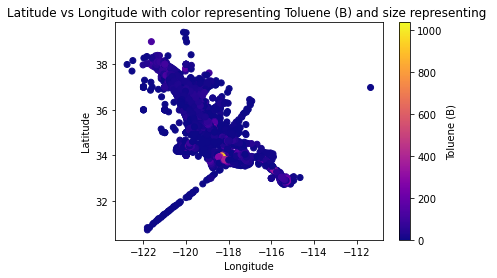

In [98]:
scatter1(full, 'Longitude', 'Latitude', c='Toluene (B)')

In [99]:
background = by_latlong(by_alt(full, 0, 2000), 33.5, 34.5, -117.6, -117.1)

slope, int = [ 14.5005209  118.29661938]
(R (correleation coefficient), p-value) = (0.4668563742379612, 0.0003727601729640331)


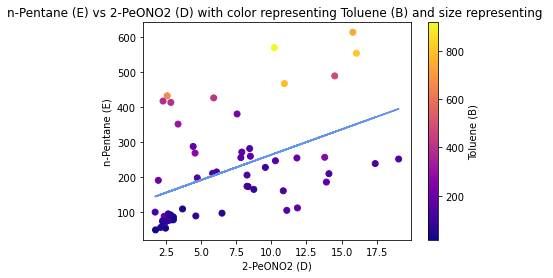

In [100]:
scatter1(background, '2-PeONO2 (D)','n-Pentane (E)', c='Toluene (B)', bestfit = 'yes')

In [179]:
full = full.replace([np.inf, -np.inf], np.nan)

In [180]:
low = by_alt(full, 0, 2000)

slope, int = [0.0497314  0.00111323]
(R (correleation coefficient), p-value) = (0.6077476893204687, 4.766881437574871e-112)


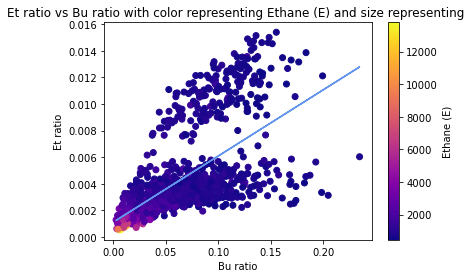

In [188]:
scatter1(low, 'Bu ratio','Et ratio', c='Ethane (E)',bestfit='yes')

slope, int = [ 1.03953873 -0.0062588 ]
(R (correleation coefficient), p-value) = (0.9106586719959192, 7.85439605763727e-21)


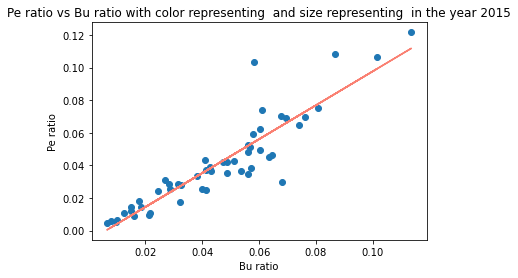

In [190]:
scatter1(low, 'Bu ratio','Pe ratio',year=2015, bestfit='yes')

In [182]:
high_plume = by_alt(by_flight(by_year(full, 2015), '1'), 17000, 26000)

slope, int = [ 0.93674567 -0.01630063]
(R (correleation coefficient), p-value) = (0.9797587956961071, 1.357824422282831e-07)


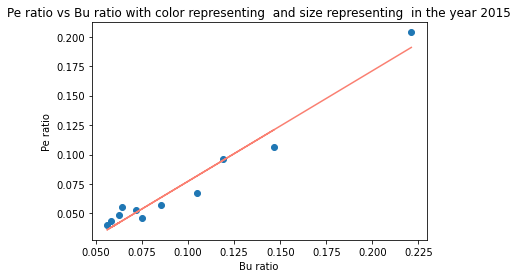

In [183]:
scatter1(high_plume, 'Bu ratio','Pe ratio',year=2015, bestfit='yes')

In [184]:
low_plume = by_alt(by_flight(by_year(full, 2015), '1'), 13000, 14000)

slope, int = [0.48017856 0.01748217]
(R (correleation coefficient), p-value) = (0.865176659631304, 0.0055239983660552265)


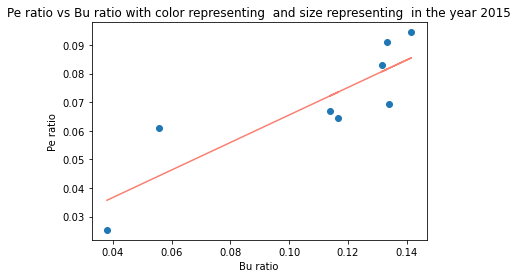

In [185]:
scatter1(low_plume, 'Bu ratio','Pe ratio',year=2015, bestfit='yes')

In [127]:
young = by_compound(by_compound(full, 'Bu ratio', .01, .03), 'Pe ratio', .01, .03)

In [128]:
young

,Snake#,Can#,Flight,Jday,date,OpenTime,CloseTime,Julian Open Time,Julian Closing Time,Jopen time Progressive,J close time Progressive,Latitude,Longitude,AltP_feet,AltP_meters,Radaralt_ft,Radaralt_m,SARP Year,Weather,Comments,H2 (ppbv)mult by 1.6,CH4 (ppmv),CO (ppbv),CO2_ppm,OCS (MS),DMS (MS),CFC-12 (C/D),CFC-11 (C/D),CFC-113 (D),CFC-114 (C/MS),H-1211 (C/D),H-1301 (C),H-2402 (D),HFC-152a (MS),HFC-134a (MS),HCFC-22 (MS),HCFC-142b,HCFC-141b (MS),HFC-227ea (MS),HCFC-124 (MS),HFC-365mfc (MS),CHCl3 (C/D),CH3CCl3 (C/MS),CCl4 (C/MS),CH2Cl2 (C/D/MS),C2HCl3 (D/MS),C2Cl4 (C/MS),CH3Cl (MS),CH3Br (C/MS),CH3I (C/D),CH2Br2 (D),CHBrCl2 (D),CHBr2Cl (D),CHBr3 (C/MS),"1,2-DCE (MS)",MeONO2 (C/D),EtONO2 (C/D),i-PrONO2 (D),n-PrONO2 (C),2-BuONO2 (D),3-PeONO2 (D),2-PeONO2 (D),3-Methyl-2-BuONO2 (D),Ethane (E),Ethene (E),Ethyne (E),Propane (E/B),Propene (E),i-Butane (E),n-Butane (E),i-Butene (E),1-Butene (E),trans-2-Butene (MS),cis-2-Butene (MS),i-Pentane (E),n-Pentane (E),1-Pentene,Isoprene (E/B),"1,3-Butadiene (B)",n-Hexane (E),n-Heptane (E),n-Octane (B),n-Nonane (B),n-Decane (B),"2,2-Dimethylbutane (B)","2,3-Dimethylbutane (MS)",2-Methylpentane (MS),3-Methylpentane (MS),2-Methylhexane (B),3-Methylhexane (B),"2,3-Dimethylpentane (B)","2,4-Dimethylpentane (B)",2-Methylheptane (B),3-Methylheptane (B),"2,2,4-Trimethylpentane (B)",Cyclopentane (B),Methylcyclopentane (B),Cyclohexane (B),Methylcylohexane (B),Benzene (E/MS),Toluene (B),Ethylbenzene (MS),m-Xylene (MS),p-Xylene (MS),m/p-Xylene (MS),o-Xylene (MS),Styrene (MS),i-Propylbenzene (MS),n-Propylbenzene (MS),3-Ethyltoluene (MS),4-Ethyltoluene (MS),2-Ethyltoluene (MS),"1,3,5-Trimethylbenzene (MS)","1,2,4-Trimethylbenzene (MS)","1,2,3-Trimethylbenzene (MS)",alpha-Pinene (MS),beta-Pinene (MS),EtCl (MS),Acetaldehyde (MS),Butanal (MS),Acetone (MS),Butanone (MS),Methanol (MS),Ethanol (MS),Pe ratio,Bu ratio,Pr ratio
54,5315,7119,SARP_3,198,7/17/19,23:06:00,23:06:48,43663.96250,43663.96310,43663.9625,43663.9631,33.800000,-118.133000,158.0,NaN,NaN,NaN,2019,NaN,over runway missed approach at Long Beach,NaN,NaN,NaN,NaN,658,19.10,508.1,228.0,69.78,16.07,3.333,3.409,0.399,30.85,120.3,253.8,22.22,24.69,NaN,NaN,1.196,15.620,2.116,77.40,81.27,2.651,1.611,502.0,6.59,1.678,0.859,0.550,1.314,0.338,15.020,7.767,2.320,4.619,0.676,9.373,1.982,3.127,1.583,820,96.0,127,692.0,31.0,148.0,442.0,0.0,4.0,0.0,0.0,236.0,193.0,0.0,25.0,0.0,54.0,15.0,4.0,5.0,0.0,9.0,19.0,50.0,28.0,9.0,12.0,14.0,NaN,NaN,NaN,22.0,12.0,25.0,12.0,7.0,24.0,36.0,8.0,NaN,NaN,19.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN,0.0,0.0,1.77,NaN,27.0,NaN,68.0,NaN,NaN,0.016202,0.021206,0.000977
85,2821,9261,SARP_2,198,7/17/19,17:20:00,17:20:30,43663.72220,43663.72260,43663.7222,43663.7226,34.100000,-117.217000,1845.0,NaN,NaN,NaN,2019,NaN,San Bern Airport,NaN,NaN,NaN,NaN,643,6.70,501.3,228.8,70.17,16.20,3.764,3.364,0.401,209.22,297.4,343.5,25.73,40.97,NaN,NaN,2.254,29.610,2.061,77.50,92.09,3.775,4.171,567.0,6.62,1.186,0.744,2.519,3.943,2.005,19.360,8.405,2.585,7.741,1.122,6.291,1.157,1.962,2.946,2297,382.0,379,1359.0,67.0,178.0,273.0,0.0,11.0,0.0,0.0,600.0,190.0,6.0,42.0,0.0,67.0,34.0,12.0,14.0,8.0,32.0,46.0,141.0,77.0,41.0,47.0,50.0,NaN,NaN,NaN,73.0,24.0,67.0,30.0,21.0,70.0,210.0,24.0,NaN,NaN,65.0,25.0,15.0,0.0,5.0,10.0,6.0,5.0,0.0,11.0,NaN,4.0,0.0,4.53,NaN,28.0,NaN,160.0,NaN,NaN,0.010326,0.023044,0.000826
119,4011,9371,SARP_2,198,7/17/19,16:08:00,16:08:49,43663.67220,43663.67280,43663.6722,43663.6728,33.967000,-117.533000,2190.0,NaN,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,666,0.00,504.5,228.5,69.00,17.22,3.742,3.462,0.404,108.70,209.6,320.7,24.15,29.22,NaN,NaN,1.560,29.660,2.042,77.30,87.19,3.245,4.031,574.0,7.43,1.781,1.013,3.165,5.171,3.150,18.850,8.647,2.464,5.844,0.893,4.681,0.858,1.356,1.945,1415,226.0,217,911.0,27.0,125.0,177.0,0.0,4.0,0.0,0.0,250.0,95.0,0.0,0.0,0.0,33.0,15.0,7.0,6.0,4.0,13.0,20.0,72.0,30.0,20.0,22.0,26.0,NaN,NaN,NaN,37.0,12.0,32.0,11.0,10.0,52.0,116.0,15.0,NaN,NaN,30.0,15.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,4.0,NaN,0.0,0.0,4.25,NaN,56.0,NaN,190.0,NaN,N

slope, int = [40.89789725 31.36854643]
(R (correleation coefficient), p-value) = (0.9242856435305378, 1.2076568154151137e-56)


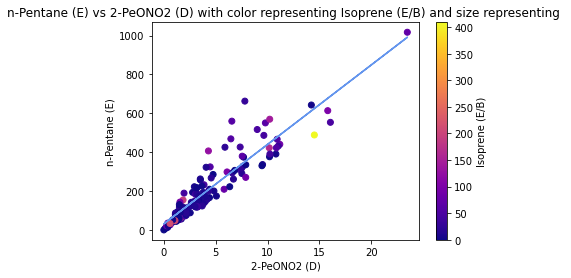

In [129]:
scatter1(young, '2-PeONO2 (D)','n-Pentane (E)', c='Isoprene (E/B)', bestfit = 'yes')

slope, int = [48.31962367 45.21647781]
(R (correleation coefficient), p-value) = (0.8480906845854854, 5.983029868084886e-38)


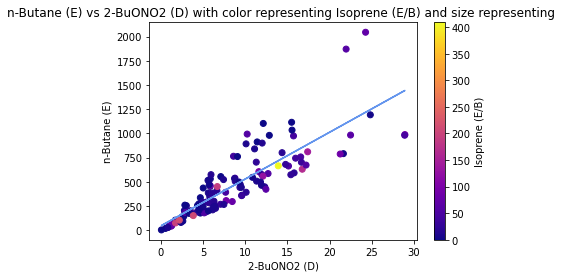

In [130]:
scatter1(young, '2-BuONO2 (D)','n-Butane (E)',  c='Isoprene (E/B)', bestfit = 'yes')

slope, int = [ 218.29089705 -309.61564839]
(R (correleation coefficient), p-value) = (0.8070375932837499, 9.197371817451928e-32)


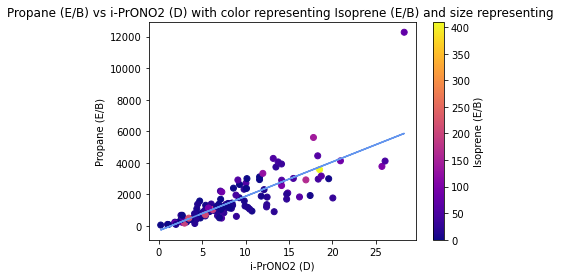

In [131]:
scatter1(young, 'i-PrONO2 (D)','Propane (E/B)', c='Isoprene (E/B)', bestfit = 'yes')